# <center> Final Project 

catatan :
    hanya bisa sampai tahap visualisasi data, pemodelan sudah mengerti langkahnya tapi codenya nge-bug 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [2]:
original_df = pd.read_csv(r"C:\Users\ASUS\Downloads\loan_data_2007_2014.csv",na_values=['.', '??'] )

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# membuat copy dataframe
df = original_df.copy(deep=True)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [5]:
df.drop(['Unnamed: 0','id','funded_amnt','annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m' , 'open_il_12m' , 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m'
,'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], axis=1, inplace=True)

alasan drop kolom :
1. 17 kolom tidak memiliki nilai, setelah cek di excelnya pun hanya berisi whitespace
2. kolom yg memuat informasi id dihapus
3. funded_amnt dihapus karena isinya sama dengan kolom loan_amnt

# Data Preprocessing

Informasi mengenai missing value dan duplikat

In [6]:
# Duplicate Rows?
df.duplicated().sum()

0

In [7]:
# Missing Value Information in Percentage
(100.00 * df.isnull().sum()) / df.shape[0]

member_id                       0.000000
loan_amnt                       0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.916553
emp_length                      4.505399
home_ownership                  0.000000
annual_inc                      0.000858
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           72.981760
purpose                         0.000000
title                           0.004718
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.006219
earliest_cr_line

# Missing values

cara mengatasi missing value : membagi dataframe ke dalam 2 kategori. membersihkan masing2 dataframe kemudian melakukan concat untuk menghasilkan dataframe yang sudah bersih.

In [8]:
# dropping kolom yang nilai missing valuenya di atas 50%
df.drop(['desc','mths_since_last_major_derog', 'next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'], axis=1, inplace=True)

# dataframe kolom numerik

In [9]:
df_numerical = df.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical.head()

,member_id,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1296599,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,...,0.00,0.00,0.00,171.62,0.0,1,0.0,NaN,NaN,NaN
1,1314167,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,...,0.00,117.08,1.11,119.66,0.0,1,0.0,NaN,NaN,NaN
2,1313524,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,...,0.00,0.00,0.00,649.91,0.0,1,0.0,NaN,NaN,NaN
3,1277178,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,...,16.97,0.00,0.00,357.48,0.0,1,0.0,NaN,NaN,NaN
4,1311748,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,...,0.00,0.00,0.00,67.79,0.0,1,0.0,NaN,NaN,NaN


In [10]:
# Missing Value Information in Percentage
(100.00 * df_numerical.isnull().sum()) / df_numerical.shape[0]

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt_inv                0.000000
int_rate                       0.000000
installment                    0.000000
annual_inc                     0.000858
dti                            0.000000
delinq_2yrs                    0.006219
inq_last_6mths                 0.006219
open_acc                       0.006219
pub_rec                        0.006219
revol_bal                      0.000000
revol_util                     0.072917
total_acc                      0.006219
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000
collections_12_mths_ex_med     0.031097


terdapat 3 kolom yang jumlah missing valuenya cukup besar, sekitar 15%

In [11]:
# mengisi missing value dengan nilai median
df_numerical.fillna(df_numerical.median().round(1), inplace=True)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
# cek dan ricek
# Missing Value Information in Percentage
(100.00 * df_numerical.isnull().sum()) / df_numerical.shape[0]

member_id                     0.0
loan_amnt                     0.0
funded_amnt_inv               0.0
int_rate                      0.0
installment                   0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_amnt               0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_l

# dataframe kolom kategori

In [13]:
df_categorical = df.select_dtypes(exclude=["int","float"])
df_categorical.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL


In [14]:
# Missing Value Information in Percentage
(100.00 * df_categorical.isnull().sum()) / df_categorical.shape[0]

term                   0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              5.916553
emp_length             4.505399
home_ownership         0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
pymnt_plan             0.000000
url                    0.000000
purpose                0.000000
title                  0.004718
zip_code               0.000000
addr_state             0.000000
earliest_cr_line       0.006219
initial_list_status    0.000000
last_pymnt_d           0.080637
last_credit_pull_d     0.009007
application_type       0.000000
dtype: float64

terlihat pada data bertipe kategori, jumlah missing value tidak ada yang lebih dari 6 persen.

In [15]:
for i in df_categorical.columns:
 df_categorical[i].fillna(df_categorical[i].mode()[0], inplace=True)
print(df_categorical)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


              term grade sub_grade                              emp_title  \
0        36 months     B        B2                                Teacher   
1        60 months     C        C4                                  Ryder   
2        36 months     C        C5                                Teacher   
3        36 months     C        C1                    AIR RESOURCES BOARD   
4        60 months     B        B5               University Medical Group   
...            ...   ...       ...                                    ...   
466280   60 months     C        C2                     Financial Advisor    
466281   60 months     D        D5  Chief of Interpretation (Park Ranger)   
466282   60 months     D        D1                                 patrol   
466283   36 months     A        A4                   Server Engineer Lead   
466284   36 months     D        D3                                Teacher   

       emp_length home_ownership verification_status issue_d  loan_status  

In [16]:
# cek dan ricek
# Missing Value Information in Percentage
(100.00 * df_categorical.isnull().sum()) / df_categorical.shape[0]

term                   0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
pymnt_plan             0.0
url                    0.0
purpose                0.0
title                  0.0
zip_code               0.0
addr_state             0.0
earliest_cr_line       0.0
initial_list_status    0.0
last_pymnt_d           0.0
last_credit_pull_d     0.0
application_type       0.0
dtype: float64

In [17]:
df_categorical.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64

In [18]:
# drop kolom yang nilai unique valuenya terlalu banyak
df_categorical.drop(['url','title','zip_code','emp_title'], axis=1, inplace=True)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
# Finalize (combine both numerical and categorical data frame using concat)
# Concat axis 1 --> Column
# Concat axis 0 --> Row
df = pd.concat([df_numerical,df_categorical],axis=1)
df.head()

,member_id,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,issue_d,loan_status,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,1296599,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,...,Dec-11,Fully Paid,n,credit_card,AZ,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL
1,1314167,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,...,Dec-11,Charged Off,n,car,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,1313524,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,...,Dec-11,Fully Paid,n,small_business,IL,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL
3,1277178,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,...,Dec-11,Fully Paid,n,other,CA,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,1311748,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,...,Dec-11,Current,n,other,OR,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL


In [20]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   member_id                   466285 non-null  int64  
 1   loan_amnt                   466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   int_rate                    466285 non-null  float64
 4   installment                 466285 non-null  float64
 5   annual_inc                  466285 non-null  float64
 6   dti                         466285 non-null  float64
 7   delinq_2yrs                 466285 non-null  float64
 8   inq_last_6mths              466285 non-null  float64
 9   open_acc                    466285 non-null  float64
 10  pub_rec                     466285 non-null  float64
 11  revol_bal                   466285 non-null  int64  
 12  revol_util                  466285 non-null  float64
 13  total_acc     

In [21]:
df.drop('member_id', axis=1,inplace=True)

# handling outlier

a. Sigma Rule for Outlier Management
When to remove outlier:

1. Data collection process is affordable / not pricey
2. Be careful to delete medical data
3. Data range is unimaginably high (far from the normal state)
   Normal human height ranging from 140 - 180. When you find a human height > 300 cm, its not normal.
4. Data is enough (Not applied on a small-sized dataset)
5. Won't remove >= 25% of all rows
6. Won't change the distribution/characteristic of all features
   Let say you have human height and continent features. You find that the average height is around 160 on all regions except      Europe (average > 175). You accidentally remove the european user data because you think that the height is outlier. This is    a malpractice of outlier removal. You will lose the characteristic from european data once you consider their height are        outliers.

In [65]:
import itertools

def remove_outliers(df,verbose=True,keep=[],imputation="median"):
    """
    Version 1.04: Add imputation method
    
    Version 1.03: Add 'Keep' on Hyperparameter
    
    Function to remove outlier by iteration
    Using Lower Bound Q1 - 1.5 IQR and Upper Bound Q3 + 1.5 IQR
    
    Version 2 Update: Add exception for categorical data type
    """
    
    outlier_presence = True
    temp_df = df.copy()
    iteration = 0
    first_length = temp_df.shape[0]
    
    all_columns = [x for x in temp_df.columns if x not in keep]
    
    # Iteration
    while outlier_presence:
        iteration += 1
        list_all_outlier = {}
        # Detect all outliers in all columns
        for col in all_columns:
            if temp_df[col].dtypes in ['float64','int64']:
                # Imputation Method
                if imputation == "mean":
                    temp_df_imputation = temp_df[col].fillna(temp_df[col].mean())
                elif imputation == "median":
                    temp_df_imputation = temp_df[col].fillna(temp_df[col].median())
                elif imputation == "mode":
                    temp_df_imputation = temp_df[col].fillna(temp_df[col].mode())
                else:
                    temp_df_imputation = temp_df[col].fillna(temp_df[col].median())
                    
                temp_value = temp_df_imputation.tolist()
                # Calculate Q1, Q3, and IQR
                q1 = np.quantile(temp_value,0.25)
                q3 = np.quantile(temp_value,0.75)
                iqr = q3 - q1
                # Create the lower & upper bound 
                lower_bound = q1 - 1.5*iqr
                upper_bound = q3 + 1.5*iqr
                # Create empty list
                outlier_index = []
                # Iterate every column values
                for index,value in enumerate(temp_value):
                    if lower_bound <= value <= upper_bound:
                        # Do nothing when the column value inside the safe boundary
                        continue
                    else:
                        # Append the index when the value is out of safe boundary as an outlier
                        outlier_index.append(index)
                # Store the result to a dictionary
                list_all_outlier[col] = outlier_index

        list_of_outliers = list(itertools.chain(*list_all_outlier.values()))
        list_of_outliers = list(set(list_of_outliers)) #Unique 
        if verbose:
            print(f"Iteration {iteration}, {len(list_of_outliers)} rows dropped")
        temp_df = temp_df.drop(list_of_outliers,axis=0).reset_index(drop=True)
        if len(list_of_outliers) == 0 or temp_df.shape[0] < 100:
            if verbose:
                print(f"Rows dropped from {first_length} to {temp_df.shape[0]}")
            break
    return(temp_df)

Iteration 1, 466285 rows dropped
Rows dropped from 466285 to 0


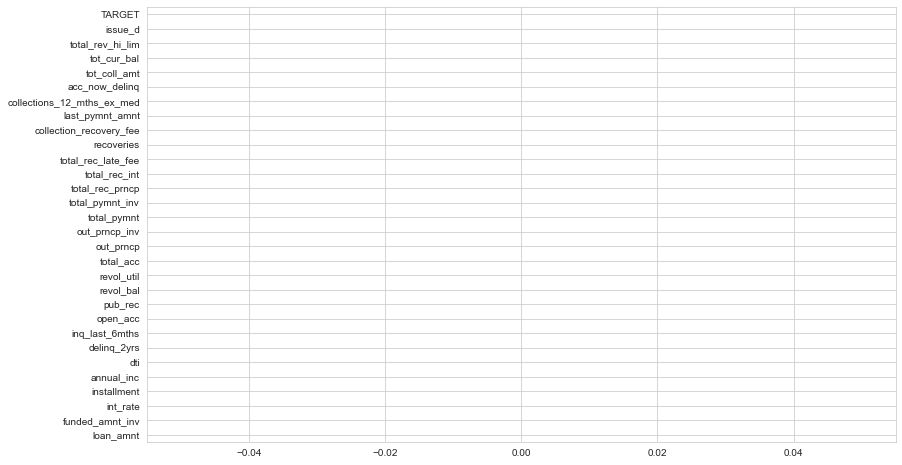

In [66]:
import matplotlib.pyplot as plt
df_clean = remove_outliers(df)

# Make the same plot
plt.figure(figsize=(16, 8))

# Create Boxplot
df_clean.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [ ]:
# terlalu banyak jumlah baris yang dihilangkan, sehingga df_clean tidak dipakai
df.shape

In [ ]:
df.isna().sum()

# menentukan kolom target

In [22]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

0    465453
1       832
Name: TARGET, dtype: int64

In [23]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

## Anomaly Detection

mengecek anomali yang terdapat dalam data

In [24]:
df['emp_length'].head(3)

0    10+ years
1     < 1 year
2    10+ years
Name: emp_length, dtype: object



null value akan diisi dengan 0 dengan asumsi peminjam belum bekerja pada saat data dibukukan.

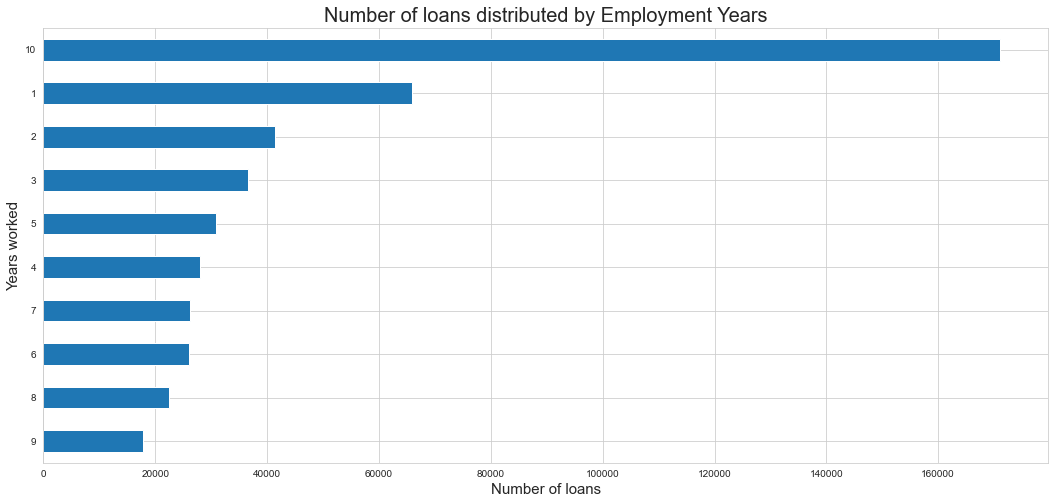

In [25]:
df['emp_length'].fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

> dapat dilihat bahwa orang yang bekerja lebih lama lebih besar pinjamannya

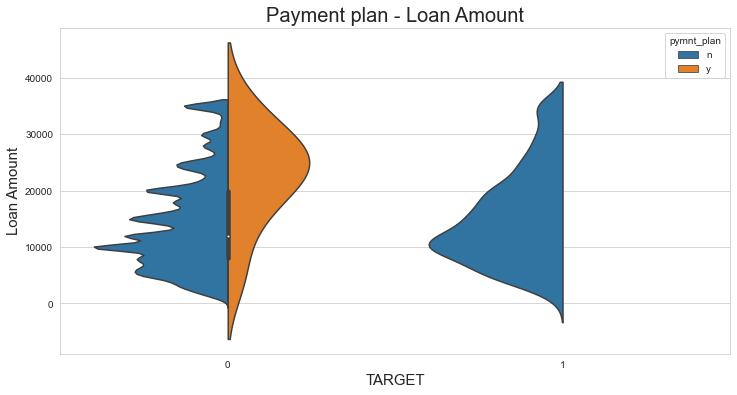

In [26]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="pymnt_plan", split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

peminjam yang mengalamin default tidak memiliki 'payment plan'

In [28]:
df.drop('policy_code',axis=1,inplace=True)

In [29]:
df.corr()['dti'].sort_values().tail(6)

revol_bal     0.143380
int_rate      0.159657
revol_util    0.200284
total_acc     0.228222
open_acc      0.303914
dti           1.000000
Name: dti, dtype: float64

membuat KDE plot



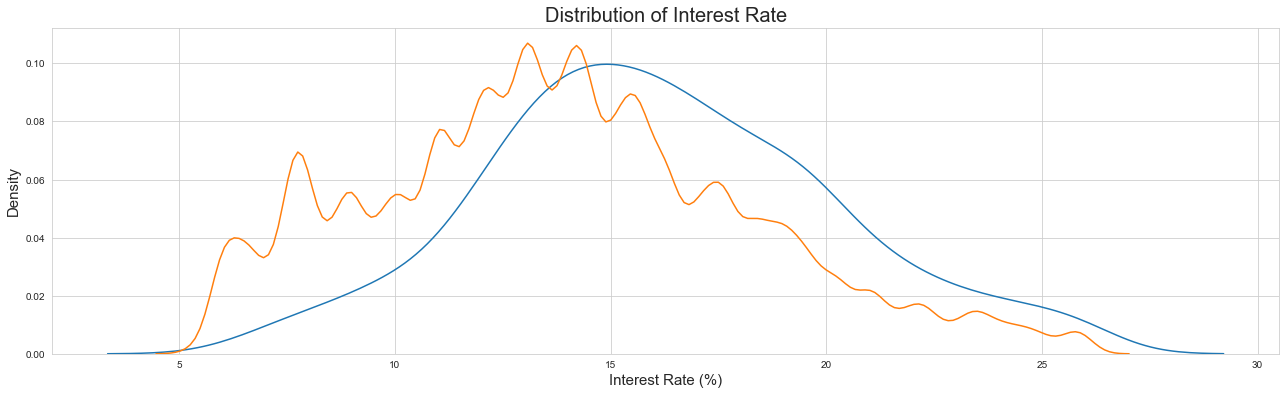

In [30]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

> The density of interest rates follow kind of a Gaussian distribution with more density on interest rates between 10%-15%.

While we are looking at distributions, some other distributions that would be interesting to examine are,

* Violin-plot of TARGET classes with distribution of loan amount differentiated by the terms. 

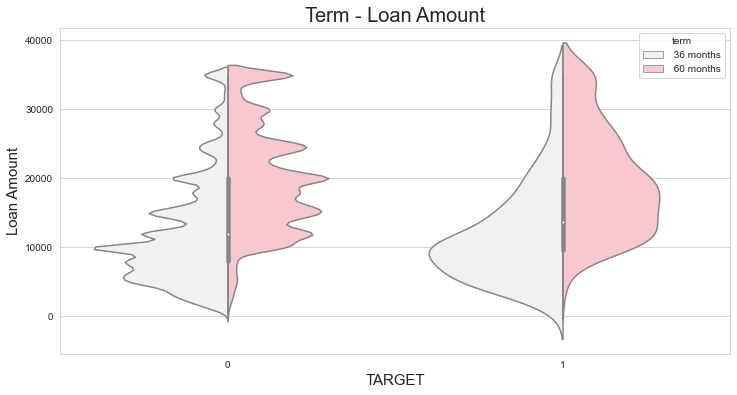

In [31]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

> Most of the Loans of higher terms have high amount and vice versa for the TARGET classes.

** Violin-plot of TARGET classes with distribution of loan amount differentiated by the application type. **

** Violin-plot of TARGET classes with distribution of interest rate differentiated by the loan grades. **

In [33]:
df['application_type'].value_counts()

INDIVIDUAL    466285
Name: application_type, dtype: int64

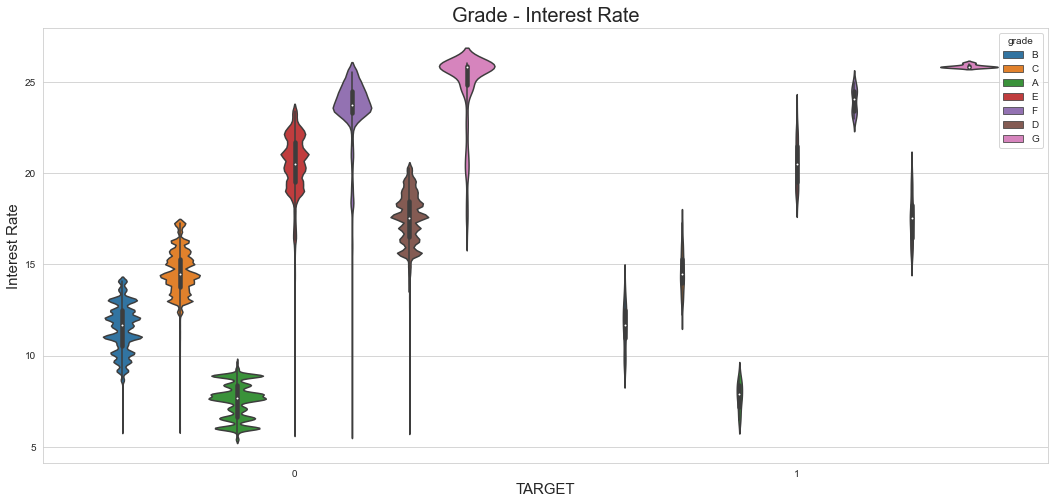

In [32]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(x="TARGET",y="int_rate",data=df, hue="grade")
plt.title("Grade - Interest Rate", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);

> Both target classes have similar kind of interest rates by grades.

> lihat polanya yang serupa

Let us also check the correlation of annual income with loan amount taken. 

In [34]:
df.corr()['annual_inc'].sort_values().tail(10)

total_rev_hi_lim    0.269239
total_rec_prncp     0.275824
total_pymnt_inv     0.298728
total_pymnt         0.299784
revol_bal           0.332316
funded_amnt_inv     0.367805
installment         0.368145
loan_amnt           0.370893
tot_cur_bal         0.445423
annual_inc          1.000000
Name: annual_inc, dtype: float64

> The annual income of the applicant has high positive correlation with the amount of loan they have taken.

** From where do most of the loans tend to be defaulted? **

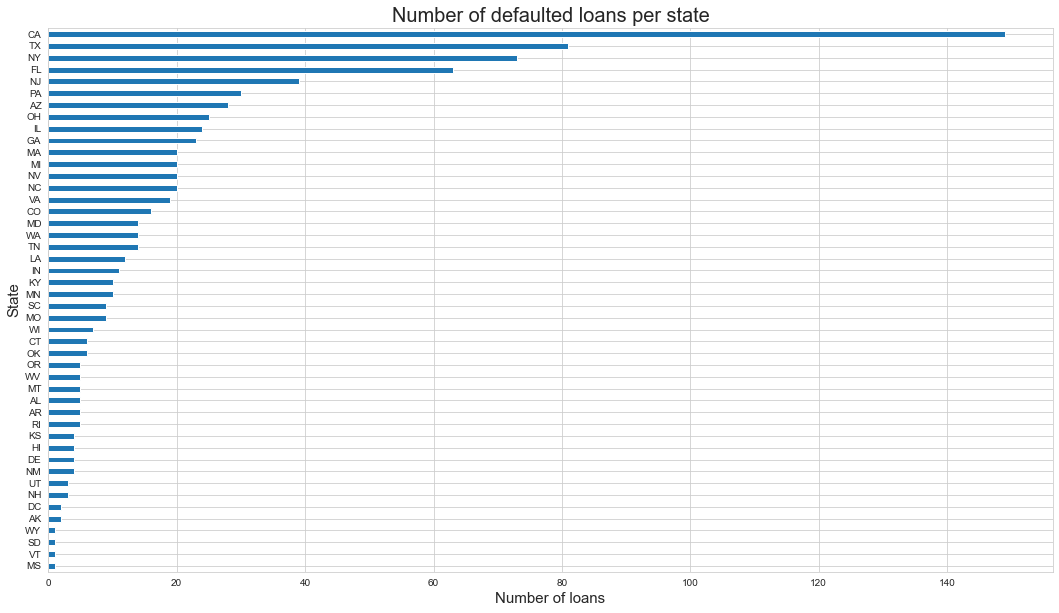

In [35]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==1].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

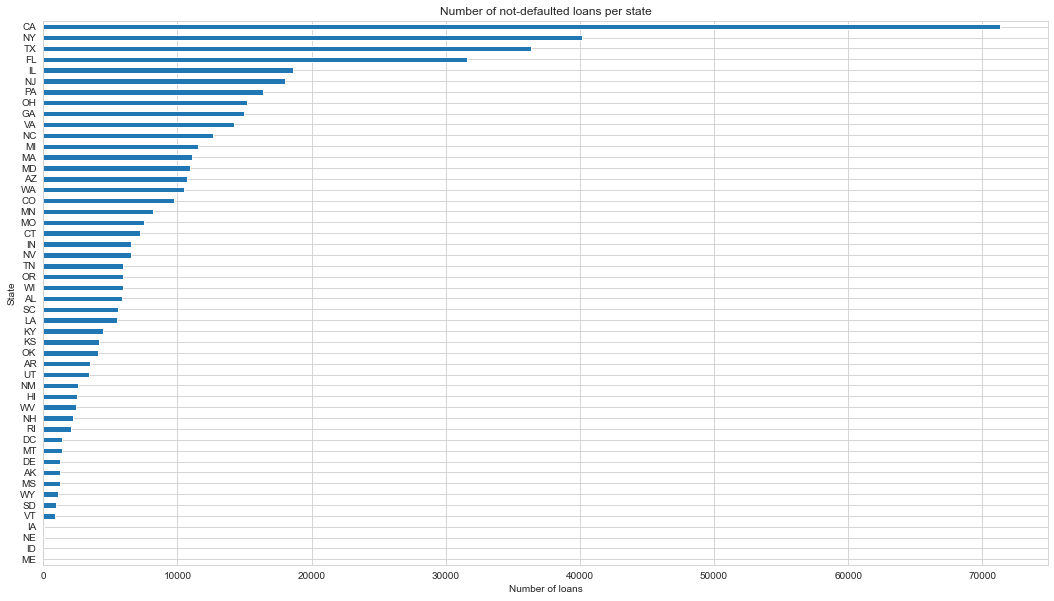

In [36]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==0].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State')
plt.xlabel('Number of loans')
plt.title('Number of not-defaulted loans per state');

> It can be seen that there are more number of loans taken amount from the same states where there are more number of defaulted risk. This is why the state cannot be taken as a major feature for knowing if a loan will be defaulted or not.


In [37]:
corr = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 funded_amnt_inv       0.005389
delinq_2yrs           0.006065
open_acc              0.006647
total_rec_int         0.007410
dti                   0.010955
total_rec_late_fee    0.013726
int_rate              0.022385
out_prncp             0.040708
out_prncp_inv         0.040712
TARGET                1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 total_rec_prncp           -0.024713
last_pymnt_amnt           -0.020145
total_pymnt               -0.019225
total_pymnt_inv           -0.018906
recoveries                -0.006534
tot_cur_bal               -0.006208
annual_inc                -0.005896
collection_recovery_fee   -0.004432
total_rev_hi_lim          -0.002636
revol_bal                 -0.001414
Name: TARGET, dtype: float64


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt_inv             466285 non-null  float64
 2   int_rate                    466285 non-null  float64
 3   installment                 466285 non-null  float64
 4   annual_inc                  466285 non-null  float64
 5   dti                         466285 non-null  float64
 6   delinq_2yrs                 466285 non-null  float64
 7   inq_last_6mths              466285 non-null  float64
 8   open_acc                    466285 non-null  float64
 9   pub_rec                     466285 non-null  float64
 10  revol_bal                   466285 non-null  int64  
 11  revol_util                  466285 non-null  float64
 12  total_acc                   466285 non-null  float64
 13  out_prncp     

In [44]:
df['issue_d']= pd.to_datetime(df['issue_d'],errors = 'coerce').dt.strftime('%Y')
df['last_pymnt_d']= pd.to_datetime(df['last_pymnt_d'].fillna('2016-01-01'),errors = 'coerce').dt.strftime('%m')
df['last_credit_pull_d']= pd.to_datetime(df['last_credit_pull_d'].fillna("2016-01-01"),errors = 'coerce').dt.strftime('%m')
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'].fillna('2001-08-01'),errors = 'coerce').dt.strftime('%m')
#df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'].fillna(value = '2016-02-01'),errors = 'coerce').dt.strftime('%Y')

# Modeling

Now, for modeling I will be using two ensemble methods and comparing them.

i) Bootstrap Aggregrating or Bagging

ii) Boosting

# 1) Bagging - Random Forest

* Ensemble of Decision Trees

* Training via the bagging method (Repeated sampling with replacement)
  * Bagging: Sample from samples
  * RF: Sample from predictors. $m=sqrt(p)$ for classification and $m=p/3$ for regression problems.

* Utilise uncorrelated trees

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Creating a classification report function,

In [46]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

Conducting train test split.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET',axis=1),df['TARGET'],test_size=0.15,random_state=101)

Freeing up the memory.

In [49]:
import gc
del original_df
gc.collect()

0

Standardizing features by removing the mean and scaling to unit variance

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ValueError: could not convert string to float: ' 36 months'

In [63]:
df[df.eq(" 36 months").any(1)]

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,loan_status,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,TARGET
0,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,...,Fully Paid,n,credit_card,AZ,NaN,f,01,01,INDIVIDUAL,0
2,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,...,Fully Paid,n,small_business,IL,08,f,01,01,INDIVIDUAL,0
3,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,...,Fully Paid,n,other,CA,NaN,f,01,01,INDIVIDUAL,0
5,5000,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,9.0,0.0,...,Fully Paid,n,wedding,AZ,08,f,01,01,INDIVIDUAL,0
7,3000,3000.0,18.64,109.43,48000.0,5.35,0.0,2.0,4.0,0.0,...,Fully Paid,n,car,CA,08,f,01,01,INDIVIDUAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466277,18000,17975.0,7.90,563.23,90000.0,10.33,1.0,0.0,16.0,0.0,...,Charged Off,n,debt_consolidation,MD,NaN,f,01,01,INDIVIDUAL,0
466278,10000,10000.0,18.25,362.78,42000.0,11.57,0.0,0.0,9.0,0.0,...,Fully Paid,n,vacation,VA,08,f,01,01,INDIVIDUAL,0
466279,15000,15000.0,13.53,509.25,66000.0,16.22,0.0,0.0,8.0,0.0,...,Current,n,credit_card,MD,NaN,w,01,01,INDIVIDUAL,0
466283,2000,2000.0,7.90,62.59,83000.0,5.39,3.0,1.0,21.0,0.0,...,Fully Paid,n,credit_card,CA,08,w,01,01,INDIVIDUAL,0


In [64]:
df.where(df == ' 36 months')

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,loan_status,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,TARGET
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_r, y_train_r = sm.fit_sample(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'ratio'

In [57]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001,random_state=21)

log_reg.fit(x_train_r, y_train_r)

NameError: name 'x_train_r' is not defined

In [58]:
print_score(log_reg, x_train_r, y_train_r, X_test, y_test, train=False)

NameError: name 'x_train_r' is not defined

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
clf_rf = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf.fit(x_train_r, y_train_r)

NameError: name 'x_train_r' is not defined

In [61]:
print_score(clf_rf, x_train_r, y_train_r, X_test, y_test, train=False)

NameError: name 'x_train_r' is not defined